In [1]:
#Dependencies
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

In [2]:
#sklearn dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')

In [3]:
# #Read demographic csv
# diabetes_data = pd.read_csv('demographic_clean_data.csv')
# diabetes_data.head()

In [4]:
#Read diabetes csv
# diabetes_data = pd.read_csv('diabetes_clean_data.csv')
# diabetes_data.head()

In [5]:
#Read nutrition csv
nutrition_data = pd.read_csv('ml_clean_data.csv')
nutrition_data.head()

,seqn,alcohol,b12_added,caffeine,carbohydrates,cholesterol,fiber,iron,calories,foodcomponent,...,lenseendiaspec,onedocdia,uomd_w_m_y,pastyrchka1c,lasta1clvl,docsaya1c,rcntdbp,rcntsbp,uomd_w_m_ydocrcntdbpsbp,lastpupilsdilated
0,51624,0.0,0.0,0,0.64,0,0.0,0.09,4,2,...,0,0,0,0,0,0,0,0,0,0
1,51624,0.0,0.0,0,0.53,0,0.0,0.07,4,2,...,0,0,0,0,0,0,0,0,0,0
2,51625,0.0,0.0,3,39.80,26,2.3,0.79,249,2,...,0,0,0,0,0,0,0,0,0,0
3,51625,0.0,0.0,1,15.52,8,0.5,0.79,94,2,...,0,0,0,0,0,0,0,0,0,0
4,51626,0.0,0.0,0,69.84,1,1.9,4.75,526,2,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Pandas get_dummies to convert categorical data
# diabetes_data = pd.get_dummies(diabetes_data)
nutrition_data = pd.get_dummies(nutrition_data)
#demographic_data = pd.get_dummies(demographic_data)

In [7]:
# diabetes_data = diabetes_data.apply(np.int64)
# diabetes_data.head()

In [8]:
# diabetes_data.dtypes

In [9]:
nutrition_data = nutrition_data.apply(np.int64)
nutrition_data.head()

,seqn,alcohol,b12_added,caffeine,carbohydrates,cholesterol,fiber,iron,calories,foodcomponent,...,lenseendiaspec,onedocdia,uomd_w_m_y,pastyrchka1c,lasta1clvl,docsaya1c,rcntdbp,rcntsbp,uomd_w_m_ydocrcntdbpsbp,lastpupilsdilated
0,51624,0,0,0,0,0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
1,51624,0,0,0,0,0,0,0,4,2,...,0,0,0,0,0,0,0,0,0,0
2,51625,0,0,3,39,26,2,0,249,2,...,0,0,0,0,0,0,0,0,0,0
3,51625,0,0,1,15,8,0,0,94,2,...,0,0,0,0,0,0,0,0,0,0
4,51626,0,0,0,69,1,1,4,526,2,...,0,0,0,0,0,0,0,0,0,0


In [10]:
nutrition_data.dtypes

seqn                       int64
alcohol                    int64
b12_added                  int64
caffeine                   int64
carbohydrates              int64
cholesterol                int64
fiber                      int64
iron                       int64
calories                   int64
foodcomponent              int64
magnesium                  int64
monosaturated_fat          int64
potassium                  int64
protein                    int64
saturated_fat              int64
sodium                     int64
sugar                      int64
trans_fat                  int64
b12                        int64
vitamin_d                  int64
agetolddiabetes            int64
lentakinginsulin           int64
seendocpastyr              int64
#chkglucose                int64
docdbpread                 int64
docsbpread                 int64
rcntldl#                   int64
docldlread                 int64
docchkfeet#                int64
prsnlchkfeet               int64
          

In [11]:
#Merge
# diabetes_nutr = diabetes_data.merge(nutrition_data,how='inner',on='SEQN')
# diabetes_nutr.head()

In [12]:
# diabetes_nutr.dtypes

In [13]:
nutrition_data.to_csv('diabetes_nutr.csv')

In [14]:
diabetes_sample = nutrition_data.sample(frac=0.001,replace=True,random_state=1)
diabetes_sample.head()

,seqn,alcohol,b12_added,caffeine,carbohydrates,cholesterol,fiber,iron,calories,foodcomponent,...,lenseendiaspec,onedocdia,uomd_w_m_y,pastyrchka1c,lasta1clvl,docsaya1c,rcntdbp,rcntsbp,uomd_w_m_ydocrcntdbpsbp,lastpupilsdilated
33003,75714,0,0,0,16,54,1,1,313,2,...,0,0,0,0,0,0,0,0,0,0
12172,59809,0,0,0,81,0,7,1,649,2,...,0,0,0,0,0,0,0,0,0,0
5192,55104,0,0,0,10,0,0,0,33,2,...,0,0,0,0,0,0,0,0,0,0
32511,75387,0,0,0,1,16,0,0,66,2,...,0,0,0,0,0,0,0,0,0,0
50057,87323,0,0,0,10,0,1,0,60,2,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# #Variables, target & shape
# X = diabetes_nutr[['Overweight','Age','PoorDiet','Race','LackOfPhyAct','HighBP','HighBS','HighChol']] #Variable
# y = diabetes_nutr['EvrToldPreDia(Bi)'].values.reshape(-1,1) #test
# print (X.shape, y.shape)

In [16]:
# #Variables, target & shape
# X = diabetes_nutr[['ALCOHOL','B12_ADDED','CAFFEINE','CARBOHYDRATES','CHOLESTEROL','FIBER','IRON','CALORIES','FOODCOMPONENT','MAGNESIUM','MONOSATURATED_FAT','POTASSIUM','PROTEIN','SATURATED_FAT','SODIUM','SUGAR']] #Variable
# y = diabetes_nutr['EvrToldPreDia(Bi)'].values.reshape(-1,1) #test
# print (X.shape, y.shape)

In [32]:
#Variables, target & shape
X = diabetes_sample[['magnesium','calories']] #Variable
y = diabetes_sample['evrtoldpredia'].values.reshape(-1) #test
print (X.shape, y.shape)

(59, 2) (59,)


In [33]:
print(f"labels: {y[:10]}")
print(f"data: {X[:10]}")

labels: [2 2 2 0 0 0 2 0 2 0]
data:        magnesium  calories
33003         40       313
12172         90       649
5192           0        33
32511          7        66
50057         18        60
43723          1       156
7813           2         0
52047          2         5
21440         32       105
32912         23       107


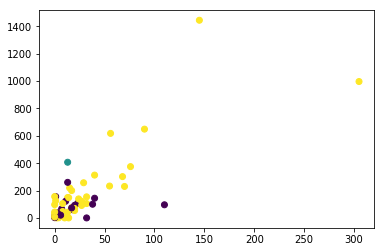

In [34]:
plt.scatter(X.iloc[:,0], X.iloc[:, 1], c=y)

In [38]:
X = diabetes_sample[['magnesium','calories']] #Variable
y = diabetes_sample['evrtoldpredia'].values.reshape(-1,1) #test
print (X.shape, y.shape)

(59, 2) (59, 1)


In [39]:
#Training and Testing
#X=Variable & y=target
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=50)

In [40]:
#Create a StandardScater model and fit training
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train) #y already binary? ML day 2


In [41]:
#
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [42]:
#LinearRegression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
print(f"trainingDataScore: {model.score(X_train, y_train)}")
print(f"testingDataScore: {model.score(X_test, y_test)}")

trainingDataScore: 0.6136363636363636
testingDataScore: 0.8


In [45]:
#Make prediction
#Use X_test_scaled data
#Plot y_test_scaled vs y_test scaled

#Random slice of model - exiting matplot or principal component analysis python

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled,y_train)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled)-y_train, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled)-y_test, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
# plt.title("Residual Plot")
# plt.show()
# plt.scatter(X[:,0], X[:,1], c=y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [46]:
#MSE & r2
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.8, R2: 0.8


In [47]:
#Lasso model
lasso = Lasso(alpha=.01).fit(X_train_scaled,y_train)
predictions = lasso.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.7085039560748111, R2: 0.8


In [48]:
#Ridge model
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train)
predictions = ridge.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.703861253190775, R2: 0.8


In [49]:
#ElasticNet model
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train)
predictions = elasticnet.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = elasticnet.score(X_test_scaled,y_test)
print(f'MSE:{MSE}, R2: {r2}')

MSE:0.7078185081437354, R2: -0.10596641897458635
